# Fuzzy logic task

Define a fuzzy controller for a distance to stop system for cars.

Also define the functions for each input, e. g. $$f_{light}(x) = min(2x, 1)$$
Write everything with Python code and visualize your results!
You can alternatively visualize it on paper.
Use center of gravity to calculate the final result.

The following information is provided:

## Inputs

### 1. Speed of vehicle
#### Set of terms
- slow
- medium
- fast


The terms are in range [0, 100]

### 2. (Own) Car weight

#### Set of terms
- light
- medium
- heavy

The terms are in range [0, 100]

## Output

## Distance to full stop

#### Set of terms
- very low
- low
- medium
- high
- very high 

The terms are in range [0, 3] $\times 10$ meters

## Inference rules

| Id 	| Speed 	| Car weight 	| Distance 	|
|:---:	|:---:	|:---:	|:---:	|
| 1 	| slow 	| light 	| very low 	|
| 2 	| slow 	| medium 	| low 	|
| 3 	| slow 	| heavy 	| medium 	|
| 4 	| medium 	| light 	| low 	|
| 5 	| medium 	| medium 	| medium 	|
| 6 	| medium 	| heavy 	| high 	|
| 7 	| fast 	| light 	| medium 	|
| 8 	| fast 	| medium 	| high 	|
| 9 	| fast	| heavy 	| very high 	|

## Question

Calculate the distance for

1) Speed = 30

2) Car weight = 60

## Solution

#### Imports

In [459]:
import matplotlib.pyplot as plt
import numpy as np

#### Rule Definitions

In [460]:
# speed_states = [1,2,3]
# weight_states = [1,2,3]
# distance_states = [1,2,3,4,5]

def distance_rule(speed: int, weight: int) -> int:
    if(speed == 1 and weight == 1):
        return 1
    elif(speed == 1 and weight == 2):
        return 2
    elif(speed == 1 and weight == 3):
        return 3
    elif(speed == 2 and weight == 1):
        return 2
    elif(speed == 2 and weight == 2):
        return 3
    elif(speed == 2 and weight == 3):
        return 4
    elif(speed == 3 and weight == 1):
        return 3
    elif(speed == 3 and weight == 2):
        return 4
    elif(speed == 3 and weight == 3):
        return 5

#### Rule creator class

In [461]:
# fuzzy curve calculator
class fuzzyCurveCalculator:
    def __init__(self, prev_state_val, curr_state_val, next_state_val) -> None:
        self.prev_state_val = prev_state_val
        self.curr_state_val = curr_state_val
        self.next_state_val = next_state_val

    # return the right 0 to 1 values else -1 if out of range

    def get_value(self, x: float) -> float:
        answer = None
        if(x < self.curr_state_val and self.prev_state_val != None):
            answer = (x - self.prev_state_val) / (self.curr_state_val - self.prev_state_val)
        elif(x > self.curr_state_val and self.next_state_val != None):
            answer = 1 - ((x - self.curr_state_val) / (self.next_state_val - self.curr_state_val)) 
        elif(x == self.curr_state_val):
            answer = 1
        else: answer = None

        if type(answer) not in [float, int] or not(0 <= answer <= 1): answer = float(-1)
        return answer

#### **rule generation**: Here we generate rules by creating instances of the fuzzyCurveCalculator class and store functions into a list that represents each semantic. We can then later access these instances with different initialization parameters and find out the value of y which is a function of input x 

In [462]:
speed_ranges = [0, 50, 100]
weight_ranges = [0, 50, 100]
distance_ranges = [0, 0.75, 1.5, 2.25, 3]

speed_rules = [None] * len(speed_ranges)
weight_rules = [None] * len(weight_ranges)
distance_rules = [None] * len(distance_ranges)

# generate curveCalculator instance for each fuzzy semantic  

# generate speed semantic rules
for i in range(len(speed_ranges)):
    prev_state_val, curr_state_val, next_state_val = None, None, None
    
    curr_state_val = speed_ranges[i]
    if(i == 0):
        next_state_val = speed_ranges[i+1]
    elif(i == len(speed_ranges) - 1):
        prev_state_val = speed_ranges[i-1]
    else:
        next_state_val = speed_ranges[i+1]
        prev_state_val = speed_ranges[i-1]
    
    speed_rules[i] = fuzzyCurveCalculator(prev_state_val, curr_state_val, next_state_val)


# generate weight semantic rules
for i in range(len(weight_ranges)):
    prev_state_val, curr_state_val, next_state_val = None, None, None
    
    curr_state_val = weight_ranges[i]
    if(i == 0):
        next_state_val = weight_ranges[i+1]
    elif(i == len(weight_ranges) - 1):
        prev_state_val = weight_ranges[i-1]
    else:
        next_state_val = weight_ranges[i+1]
        prev_state_val = weight_ranges[i-1]
    
    weight_rules[i] = fuzzyCurveCalculator(prev_state_val, curr_state_val, next_state_val)


# generate distance semantic rules
for i in range(len(distance_ranges)):
    prev_state_val, curr_state_val, next_state_val = None, None, None
    
    curr_state_val = distance_ranges[i]
    if(i == 0):
        next_state_val = distance_ranges[i+1]
    elif(i == len(distance_ranges) - 1):
        prev_state_val = distance_ranges[i-1]
    else:
        next_state_val = distance_ranges[i+1]
        prev_state_val = distance_ranges[i-1]
    
    distance_rules[i] = fuzzyCurveCalculator(prev_state_val, curr_state_val, next_state_val)

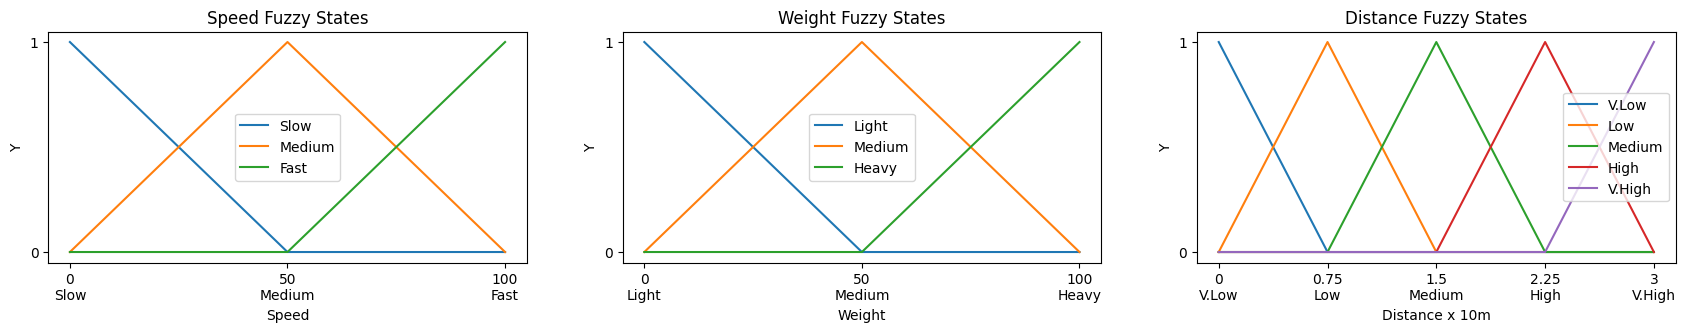

In [463]:
# speed fuzzy graph (input)
plt.figure(figsize=(21,3))
plt.subplot(1,3,1)
speed_fuzzy_x, speed_fuzzy_y = speed_ranges, [[min(1, max(0, x)) for x in [speed_rules[i].get_value(x) for i in range(len(speed_ranges))]] for x in speed_ranges]
x_labels = ["Slow", "Medium", "Fast"]
plt.plot(speed_fuzzy_x, speed_fuzzy_y), plt.title("Speed Fuzzy States"), plt.xlabel("Speed"), plt.ylabel("Y")
plt.xticks(speed_fuzzy_x, [f"{speed_fuzzy_x[x]}\n{x_labels[x]}" for x in range(len(speed_fuzzy_x))]), plt.yticks([0,1])
plt.legend(x_labels)

# weight fuzzy graph (input)
plt.subplot(1,3,2)
weight_fuzzy_x, weight_fuzzy_y = weight_ranges, [[min(1, max(0, x)) for x in [weight_rules[i].get_value(x) for i in range(len(weight_ranges))]] for x in weight_ranges]
x_labels = ["Light", "Medium", "Heavy"]
plt.plot(weight_fuzzy_x, weight_fuzzy_y), plt.title("Weight Fuzzy States"), plt.xlabel("Weight"), plt.ylabel("Y")
plt.xticks(weight_fuzzy_x, [f"{weight_fuzzy_x[x]}\n{x_labels[x]}" for x in range(len(weight_fuzzy_x))]), plt.yticks([0,1])
plt.legend(x_labels)

# distance fuzzy graph (output)
plt.subplot(1,3,3)
distance_fuzzy_x, distance_fuzzy_y = distance_ranges, [[min(1, max(0, x)) for x in [distance_rules[i].get_value(x) for i in range(len(distance_ranges))]] for x in distance_ranges]
x_labels = ["V.Low", "Low", "Medium", "High", "V.High"]
plt.plot(distance_fuzzy_x, distance_fuzzy_y), plt.title("Distance Fuzzy States"), plt.xlabel("Distance x 10m"), plt.ylabel("Y")
plt.xticks(distance_fuzzy_x, [f"{distance_fuzzy_x[x]}\n{x_labels[x]}" for x in range(len(distance_fuzzy_x))]), plt.yticks([0,1])
plt.legend(x_labels)

plt.show()

In [464]:
speed = 30
weight = 60

speed_state_values = []
weight_state_values = []

# find valid states of speed and weights that give required values in the y axis of the functions
for state, i in enumerate(speed_rules):
    speed_state_values.append([state + 1, i.get_value(speed)])

for state, i in enumerate(weight_rules):
    weight_state_values.append([state + 1, i.get_value(weight)])

# filter out states by valid y outputs
speed_state_values = [x for x in speed_state_values if x[1] != float(-1)]
weight_state_values = [x for x in weight_state_values if x[1] != float(-1)]

In [465]:
speed_state_values, weight_state_values

([[1, 0.4], [2, 0.6]], [[2, 0.8], [3, 0.2]])

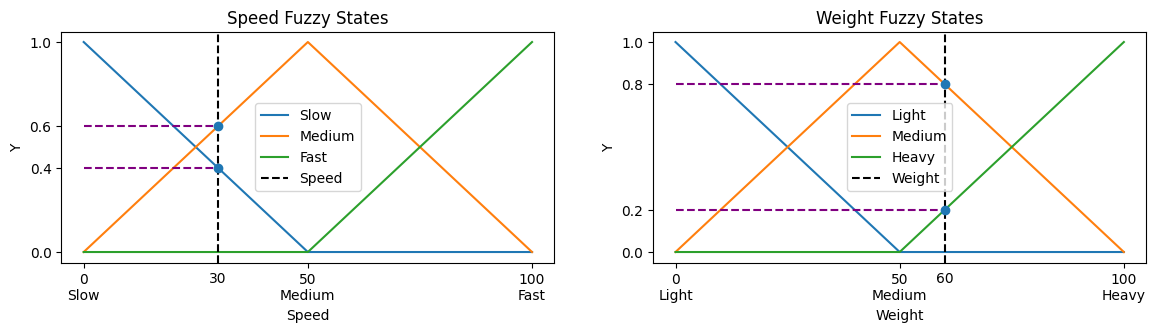

In [467]:
# speed fuzzy graph (input)

plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
speed_fuzzy_x, speed_fuzzy_y = speed_ranges, [[min(1, max(0, x)) for x in [speed_rules[i].get_value(x) for i in range(len(speed_ranges))]] for x in speed_ranges]
x_labels = ["Slow", "Medium", "Fast", "Speed"]
y_labels = [0,1] + [x[1] for x in speed_state_values]
plt.plot(speed_fuzzy_x, speed_fuzzy_y), plt.title("Speed Fuzzy States"), plt.xlabel("Speed"), plt.ylabel("Y"), plt.text(x=speed - 2, y = -0.142, s=str(speed))
plt.axvline(x=speed, ls="--", c="black"), plt.scatter([speed]*len(speed_state_values), [x[1] for x in speed_state_values], zorder=100)
for x,y in [x for x in speed_state_values]:
    plt.hlines(y, xmax=speed, xmin=0, ls="--", color="purple")
plt.xticks(speed_fuzzy_x, [f"{speed_fuzzy_x[x]}\n{x_labels[x]}" for x in range(len(speed_fuzzy_x))]), plt.yticks(y_labels)
plt.legend(x_labels)

# weight fuzzy graph (input)
plt.subplot(1,2,2)
weight_fuzzy_x, weight_fuzzy_y = weight_ranges, [[min(1, max(0, x)) for x in [weight_rules[i].get_value(x) for i in range(len(weight_ranges))]] for x in weight_ranges]
x_labels = ["Light", "Medium", "Heavy", "Weight"]
y_labels = [0,1] + [x[1] for x in weight_state_values]
plt.plot(weight_fuzzy_x, weight_fuzzy_y), plt.title("Weight Fuzzy States"), plt.xlabel("Weight"), plt.ylabel("Y"), plt.text(x=weight - 2, y = -0.142, s=str(weight))
plt.axvline(x=weight, ls="--", c="black"), plt.scatter([weight]*len(weight_state_values), [x[1] for x in weight_state_values], zorder=100)
for x,y in [x for x in weight_state_values]:
    plt.hlines(y, xmax=weight, xmin=0, ls="--", color="purple")
plt.xticks(weight_fuzzy_x, [f"{weight_fuzzy_x[x]}\n{x_labels[x]}" for x in range(len(weight_fuzzy_x))]), plt.yticks(y_labels)
plt.legend(x_labels)

plt.show()

#### Calculating min of speed and weight state values and its corresponding distance state values

In [468]:
distance_state_levels = []

for i in speed_state_values:
    for j in weight_state_values:
        distance_state = distance_rule(speed=i[0], weight=j[0])
        y_value = min(i[1], j[1])
        distance_state_levels.append([distance_state, y_value])

distance_cog_points = sorted(distance_state_levels, key= lambda x: x[0])
temp = []
for i in distance_cog_points:
    if(i[0] in [x[0] for x in temp]): continue
    state_levels = [x for x in distance_cog_points if x[0] == i[0]]
    state_levels = sorted(state_levels, key= lambda x: x[1])
    temp.append(state_levels[-1])

distance_cog_points = temp

these are the distance state values on the y axis

In [469]:
distance_cog_points

[[2, 0.4], [3, 0.6], [4, 0.2]]

#### Calculating Centre Of Gravity with sampling resolution = 1000 (1000 samples on the x axis)

In [470]:
start, end = distance_ranges[0], distance_ranges[-1]

sample_graph_plot = [[],[]]

numerator = 0
denominator = 0
for x_value in np.linspace(start, end, 1000):
    
    # calculate the y value for each state in distance fuzzy state and then find the max to get the highest value on the y axis
    state_outputs = []
    for state, level in distance_state_levels:
        y_value_default = distance_rules[state - 1].get_value(float(x_value))
        y_value_max = [x for x in distance_cog_points if x[0] == state][0][1]
        state_outputs.append(min(y_value_default, y_value_max))
    
    y_value = max(state_outputs)

    numerator += x_value * y_value
    denominator += y_value
    
    sample_graph_plot[0].append(x_value), sample_graph_plot[1].append(max(state_outputs))

COG = round(numerator / denominator, 3)
print(COG)

1.375


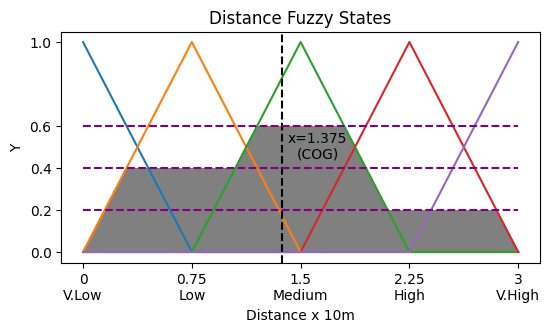

In [471]:
# speed fuzzy graph (input)
plt.figure(figsize=(21,3))

# distance fuzzy graph (output)
plt.subplot(1,3,3)
distance_fuzzy_x, distance_fuzzy_y = distance_ranges, [[min(1, max(0, x)) for x in [distance_rules[i].get_value(x) for i in range(len(distance_ranges))]] for x in distance_ranges]
x_labels = ["V.Low", "Low", "Medium", "High", "V.High"]
y_labels = [0,1] + [x[1] for x in distance_cog_points]
plt.plot(distance_fuzzy_x, distance_fuzzy_y), plt.title("Distance Fuzzy States"), plt.xlabel("Distance x 10m"), plt.ylabel("Y"), plt.text(x=COG + 0.033, y = 0.525, s=f"x={COG}", c="black", zorder=100), plt.text(x=COG + 0.1, y = 0.45, s="(COG)", c="black", zorder=100)
plt.axvline(x=COG, ls="--", c="black")
plt.xticks(distance_fuzzy_x, [f"{distance_fuzzy_x[x]}\n{x_labels[x]}" for x in range(len(distance_fuzzy_x))]), plt.yticks(y_labels)
for x,y in [x for x in distance_cog_points]:
    plt.hlines(y, xmax=max(distance_ranges), xmin=0, ls="--", color="purple")
for x,y in [[sample_graph_plot[0][i], sample_graph_plot[1][i]] for i in range(len(sample_graph_plot[0]))]:
    plt.vlines(x=x, ymin=0, ymax=y, zorder=-1, color="gray")
plt.show()

In [472]:
print(f"Predicted Distance to full stop = {COG * 10}m")

Predicted Distance to full stop = 13.75m


# Task 2 (Research)

Try out NumPy: [NumPy](https://numpy.org/) [Quickstart](https://numpy.org/devdocs/user/quickstart.html)

Try out Pandas: [Pandas](https://pandas.pydata.org/) [Quickstart](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)

Try out SKlearn: [Scikit-learn](https://scikit-learn.org/stable/) [Quickstart](https://scikit-learn.org/stable/getting_started.html)

We will use the packages mentioned above in the next practical sessions. Familiarize yourself with the mentioned packages.